In [1]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import timeit

In [2]:
# loading dasets
train = pd.read_csv("C:/Users/Dell user/Desktop/Competition/Train.csv")
test = pd.read_csv("C:/Users/Dell user/Desktop/Competition/Test.csv")

In [3]:
# calculating the shape of datasets
print(train.shape, test.shape)

# taking a look of train data
train.head()

(26205, 165) (10726, 164)


,ID,persistent_id,day,prediction_type,count_norm_00_0_,count_norm_00_1_,count_norm_00_2_,count_norm_00_3_,count_norm_01_0_,count_norm_01_1_,...,speed_avg_21_3_,speed_avg_22_0_,speed_avg_22_1_,speed_avg_22_2_,speed_avg_22_3_,speed_avg_23_0_,speed_avg_23_1_,speed_avg_23_2_,speed_avg_23_3_,target
0,5031503060366260313_X_lbo_weekday_X_morning_ru...,5031503060366260313,lbo_weekday,morning_rush_hour,0.000182,0.000158,0.000245,0.000193,0.000037,0.000126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.117225
1,16056514184983200366_X_first_holiday_X_morning...,16056514184983200366,first_holiday,morning_rush_hour,0.000472,0.000332,0.000348,0.000374,0.000209,0.000368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.406198
2,13054492825045321147_X_other_holiday_X_evening...,13054492825045321147,other_holiday,evening_rush_hour,NaN,NaN,NaN,NaN,NaN,NaN,...,10.887452,10.686708,10.957412,9.637232,12.404789,NaN,NaN,NaN,NaN,9.866890
3,1522222289334056397_X_other_holiday_X_morning_...,1522222289334056397,other_holiday,morning_rush_hour,0.000456,0.000341,0.000435,0.000187,0.000280,0.000268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.200478
4,5439159580869117218_X_lbo_weekday_X_morning_ru...,5439159580869117218,lbo_weekday,morning_rush_hour,0.000121,0.000271,0.000074,0.000096,0.000158,0.000105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.313524


In [4]:
# taking a look of test data
test.head()

,ID,persistent_id,day,prediction_type,count_norm_00_0_,count_norm_00_1_,count_norm_00_2_,count_norm_00_3_,count_norm_01_0_,count_norm_01_1_,...,speed_avg_21_2_,speed_avg_21_3_,speed_avg_22_0_,speed_avg_22_1_,speed_avg_22_2_,speed_avg_22_3_,speed_avg_23_0_,speed_avg_23_1_,speed_avg_23_2_,speed_avg_23_3_
0,16109659673749361042_X_second_weekday_X_evenin...,16109659673749361042,second_weekday,evening_rush_hour,NaN,NaN,NaN,NaN,NaN,NaN,...,14.433351,13.725785,12.298889,14.254878,12.648932,14.665032,NaN,NaN,NaN,NaN
1,4970182211076306984_X_second_weekday_X_morning...,4970182211076306984,second_weekday,morning_rush_hour,0.000067,0.000098,0.000068,0.000038,NaN,0.000015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,123728644628042262_X_last_weekday_X_morning_ru...,123728644628042262,last_weekday,morning_rush_hour,0.000094,0.000073,0.000081,0.000044,0.000071,0.000017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8792139194739736123_X_other_holiday_X_evening_...,8792139194739736123,other_holiday,evening_rush_hour,NaN,NaN,NaN,NaN,NaN,NaN,...,10.179595,9.385983,8.814848,8.092542,9.408316,9.109546,NaN,NaN,NaN,NaN
4,265211915043594282_X_other_weekday_X_morning_r...,265211915043594282,other_weekday,morning_rush_hour,0.000258,0.000136,0.000148,0.000144,0.000082,0.000141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It seems that both sets contain NaN values. Let us see how many null values there are.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26205 entries, 0 to 26204
Columns: 165 entries, ID to target
dtypes: float64(161), object(3), uint64(1)
memory usage: 33.0+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Columns: 164 entries, ID to speed_avg_23_3_
dtypes: float64(160), object(3), uint64(1)
memory usage: 13.4+ MB


In [7]:
train.describe()

,persistent_id,count_norm_00_0_,count_norm_00_1_,count_norm_00_2_,count_norm_00_3_,count_norm_01_0_,count_norm_01_1_,count_norm_01_2_,count_norm_01_3_,count_norm_02_0_,...,speed_avg_21_3_,speed_avg_22_0_,speed_avg_22_1_,speed_avg_22_2_,speed_avg_22_3_,speed_avg_23_0_,speed_avg_23_1_,speed_avg_23_2_,speed_avg_23_3_,target
count,2.620500e+04,11786.000000,11666.000000,11533.000000,11506.000000,10815.000000,10766.000000,10952.000000,10807.000000,10187.000000,...,12320.000000,12299.000000,12157.000000,12150.000000,12248.000000,0.0,0.0,0.0,0.0,26205.000000
mean,9.050682e+18,0.000257,0.000235,0.000221,0.000209,0.000203,0.000191,0.000174,0.000165,0.000149,...,10.896891,11.090316,11.033430,11.240719,11.451566,NaN,NaN,NaN,NaN,10.657043
std,5.148797e+18,0.000251,0.000244,0.000229,0.000215,0.000216,0.000209,0.000193,0.000185,0.000163,...,3.418744,3.559601,3.374916,3.442365,3.545703,NaN,NaN,NaN,NaN,4.165069
min,4.315335e+16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.054627,0.091633,0.010289,0.174166,0.001967,NaN,NaN,NaN,NaN,0.038614
25%,4.669295e+18,0.000086,0.000070,0.000070,0.000061,0.000059,0.000053,0.000048,0.000045,0.000044,...,8.489084,8.562541,8.566301,8.718125,8.897950,NaN,NaN,NaN,NaN,7.464292
50%,8.909477e+18,0.000171,0.000145,0.000135,0.000134,0.000122,0.000113,0.000099,0.000093,0.000088,...,10.868105,11.082534,11.098376,11.274353,11.499475,NaN,NaN,NaN,NaN,10.318112
75%,1.347676e+19,0.000337,0.000308,0.000278,0.000281,0.000260,0.000246,0.000223,0.000210,0.000194,...,13.239788,13.456446,13.376871,13.629695,13.810462,NaN,NaN,NaN,NaN,13.531360
max,1.844218e+19,0.002558,0.002606,0.002603,0.002012,0.002496,0.002016,0.001767,0.001942,0.001874,...,35.483279,31.029553,25.343286,26.582101,32.988563,NaN,NaN,NaN,NaN,45.497055


C:\Users\Dell user\AppData\Local\Temp\ipykernel_3824\1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

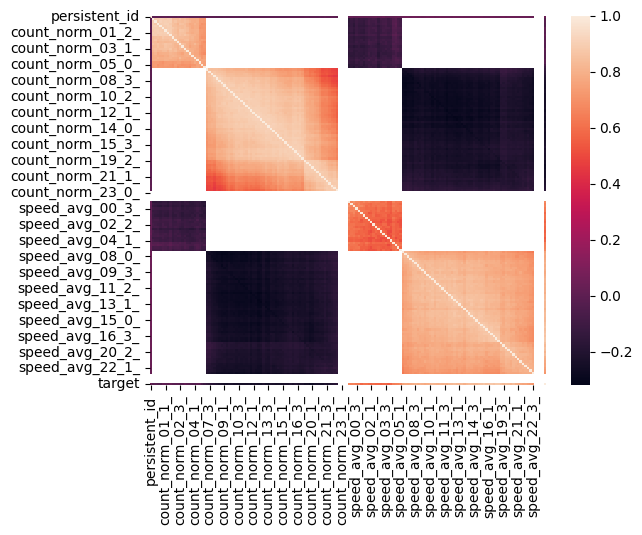

In [8]:
sns.heatmap(train.corr())

In [9]:
train.isna().sum()

ID                      0
persistent_id           0
day                     0
prediction_type         0
count_norm_00_0_    14419
                    ...  
speed_avg_23_0_     26205
speed_avg_23_1_     26205
speed_avg_23_2_     26205
speed_avg_23_3_     26205
target                  0
Length: 165, dtype: int64

In [10]:
test.isna().sum()

ID                      0
persistent_id           0
day                     0
prediction_type         0
count_norm_00_0_     5905
                    ...  
speed_avg_22_3_      5583
speed_avg_23_0_     10726
speed_avg_23_1_     10726
speed_avg_23_2_     10726
speed_avg_23_3_     10726
Length: 164, dtype: int64

There are too many missing values. Let us clean our data.

In [16]:
# we set a clean function
def clean(df):
    df_1 = pd.get_dummies(df["day"]).astype('float64')
    df = pd.concat([df, df_1], axis=1)
    df.drop(columns=[col for col in df.columns 
                     if df[col].isna().sum().sum() == df.shape[0]] + 
            ['ID', 'persistent_id', 'day', 'prediction_type'], 
            inplace=True)
    for col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)
    
    return df

In [17]:
train_new = clean(train)
X_test = clean(test)
train_new.head()

,count_norm_00_0_,count_norm_00_1_,count_norm_00_2_,count_norm_00_3_,count_norm_01_0_,count_norm_01_1_,count_norm_01_2_,count_norm_01_3_,count_norm_02_0_,count_norm_02_1_,...,speed_avg_22_2_,speed_avg_22_3_,target,first_holiday,first_weekday,last_weekday,lbo_weekday,other_holiday,other_weekday,second_weekday
0,0.000182,0.000158,0.000245,0.000193,0.000037,0.000126,0.000246,0.000045,0.000114,0.000163,...,11.240719,11.451566,5.117225,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000472,0.000332,0.000348,0.000374,0.000209,0.000368,0.000424,0.000197,0.000200,0.000269,...,11.240719,11.451566,14.406198,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000257,0.000235,0.000221,0.000209,0.000203,0.000191,0.000174,0.000165,0.000149,0.000143,...,9.637232,12.404789,9.866890,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000456,0.000341,0.000435,0.000187,0.000280,0.000268,0.000214,0.000202,0.000151,0.000114,...,11.240719,11.451566,8.200478,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000121,0.000271,0.000074,0.000096,0.000158,0.000105,0.000094,0.000189,0.000061,0.000025,...,11.240719,11.451566,10.313524,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
train_new.isna().sum().sum()

0

In [19]:
X_test.isna().sum().sum()

0

In [20]:
train_new.dtypes

count_norm_00_0_    float64
count_norm_00_1_    float64
count_norm_00_2_    float64
count_norm_00_3_    float64
count_norm_01_0_    float64
                     ...   
last_weekday        float64
lbo_weekday         float64
other_holiday       float64
other_weekday       float64
second_weekday      float64
Length: 160, dtype: object

Now we see that train and test sets have no missing values

In [21]:
# 
ratio = round(X_test.shape[0] / (train_new.shape[0] + X_test.shape[0]),1)
ratio

0.3

In [22]:
# set dependent and independent variables
X = train_new.drop(['target'], axis = 1)
y = train.target

In [23]:
# Splitting the data into training and testing sets
X_train, X_Xval, y_train, y_val = train_test_split(X, y, test_size = ratio)

In [24]:
# Instantiate model
model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [25]:
# Evaluate on the test set
y_pred = model.predict(X_Xval)
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 2.640577772951726


In [26]:
# Make prediction on the test set
test_df = X_test
predictions = model.predict(test_df)

# Create a submission file
sub_file = pd.DataFrame({'ID': pd.read_csv("C:/Users/Dell user/Desktop/Competition/Test.csv").ID, 'target': predictions})
sub_file.head()

,ID,target
0,16109659673749361042_X_second_weekday_X_evenin...,12.103578
1,4970182211076306984_X_second_weekday_X_morning...,15.668726
2,123728644628042262_X_last_weekday_X_morning_ru...,14.110675
3,8792139194739736123_X_other_holiday_X_evening_...,7.769865
4,265211915043594282_X_other_weekday_X_morning_r...,11.732916


In [27]:
# convert the file to csv
sub_file.to_csv('New_Submission_2.csv', index = False)

In [28]:
execution_time = timeit.timeit(stmt=''' 
# Code snippet to measure execution time
''', number=1)

print(f"Execution time: {execution_time} seconds")

Execution time: 3.00002284348011e-07 seconds
